<a href="https://colab.research.google.com/github/pachterlab/GRNP_2020/blob/master/notebooks/figure_generation/GenFigS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generates figure S6**

This notebook generates supplementary figure 6, showing the dependence between gc content, transcript length and FSCM/CU.

Steps:
1. Download the code and processed data
2. Setup the R environment
3. Generate the figures

The data for this figure is produced by the following notebooks:

Processing of FASTQ files with kallisto and bustools:

https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVAL.ipynb

Preprocessing of BUG files:

https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVAL.ipynb

Precalculate figure data: 

No notebook is available for generation of data.




**1. Download the code and processed data**

In [1]:
#download the R code
![ -d "GRNP_2020" ] && rm -r GRNP_2020

!git clone https://github.com/pachterlab/GRNP_2020.git


Cloning into 'GRNP_2020'...
remote: Enumerating objects: 399, done.
remote: Counting objects: 100% (399/399), done.
remote: Compressing objects: 100% (339/339), done.
remote: Total 2117 (delta 297), reused 87 (delta 60), pack-reused 1718
Receiving objects: 100% (2117/2117), 11.23 MiB | 22.08 MiB/s, done.
Resolving deltas: 100% (1482/1482), done.


In [2]:
#download processed data from Zenodo
![ -d "figureData" ] && rm -r figureData
!mkdir figureData
!cd figureData && wget https://zenodo.org/record/4661263/files/FigureData.zip?download=1 && unzip 'FigureData.zip?download=1' && rm 'FigureData.zip?download=1'



--2021-04-05 16:30:07--  https://zenodo.org/record/4661263/files/FigureData.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7490400 (7.1M) [application/octet-stream]
Saving to: ‘FigureData.zip?download=1’

FigureData.zip?down 100%[===================>]   7.14M  5.68MB/s    in 1.3s    

2021-04-05 16:30:10 (5.68 MB/s) - ‘FigureData.zip?download=1’ saved [7490400/7490400]

Archive:  FigureData.zip?download=1
 extracting: Fig3C_r1.RDS            
 extracting: Fig3C_r2.RDS            
 extracting: Fig3_h1.RDS             
 extracting: Fig3_h2.RDS             
  inflating: Fig4AC_ldata.RDS        
  inflating: Fig4AC_ldata2.RDS       
  inflating: Fig4_DE.RDS             
  inflating: gc.RDS                  
  inflating: simDepthData.RDS        
  inflating: simFcData.RDS           
  inflating: simGexData.RDS          
 extracting: simMuData.RDS  

In [3]:
#Check that download worked
!cd figureData && ls -l && cd EVAL && ls -l

total 7940
-rw-r--r-- 1 root root     239 Jun 30  2020 Fig3C_r1.RDS
-rw-r--r-- 1 root root     233 Jun 30  2020 Fig3C_r2.RDS
-rw-r--r-- 1 root root     683 Jun 30  2020 Fig3_h1.RDS
-rw-r--r-- 1 root root     830 Jun 30  2020 Fig3_h2.RDS
-rw-r--r-- 1 root root  372141 Apr  3 16:59 Fig4AC_ldata2.RDS
-rw-r--r-- 1 root root  480126 Apr  3 16:59 Fig4AC_ldata.RDS
-rw-r--r-- 1 root root 3949960 Feb 25 18:38 Fig4_DE.RDS
-rw-r--r-- 1 root root  304548 Feb 26 13:30 gc.RDS
-rw-r--r-- 1 root root 1128027 Feb 15 11:34 simDepthData.RDS
-rw-r--r-- 1 root root  621646 Feb 15 13:22 simFcData.RDS
-rw-r--r-- 1 root root 1237109 Feb 15 15:46 simGexData.RDS
-rw-r--r-- 1 root root     284 Feb 15 01:28 simMuData.RDS
/bin/bash: line 0: cd: EVAL: No such file or directory


**2. Prepare the R environment**

In [4]:
#switch to R mode
%reload_ext rpy2.ipython


In [5]:
#install the R packages and setup paths
%%R
install.packages("dplyr")
install.packages("ggplot2")
install.packages("ggpubr")



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 949019 bytes (926 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [22]:
%%R
install.packages("hexbin")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/hexbin_1.28.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1066670 bytes (1.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

**3. Generate the figures**


In [23]:
#First set some path variables
%%R
source("GRNP_2020/RCode/pathsGoogleColab.R")


In [24]:
#Import helpers (available in other notebooks)
%%R
library(ggplot2)
library(ggpubr)
library(dplyr)


In [15]:
#create figure directory
![ -d "figures" ] && rm -r figures
!mkdir figures

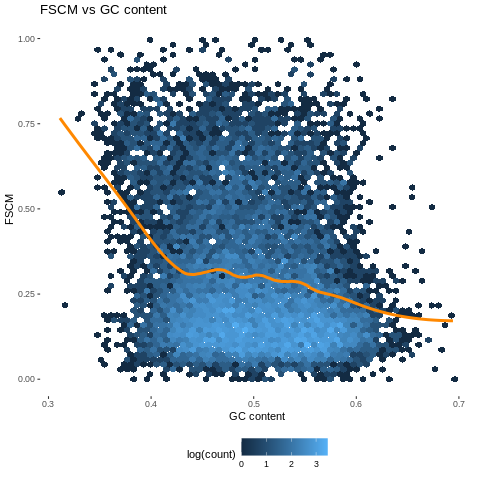

In [25]:
%%R
###########################################
#Load the data
###########################################

gctlcu = readRDS(file=paste0(figure_data_path, "gc.RDS"))

######################
#Plot A
#####################
dsPlot = tibble(x=gctlcu$gc, y=gctlcu$FSCM)
loess_fit = loess(y~x, dsPlot, span = 0.3)
dsLoess = data.frame(x = dsPlot$x, y = predict(loess_fit))

pA = ggplot(dsPlot, aes(x=x, y=y)) +
  stat_binhex(bins=60,na.rm = TRUE, mapping=aes(x = x, y=y, fill = log(..count..))) + # opts(aspect.ratio = 1) +
  geom_line(data=dsLoess, color="#FF8800", size=1.4) + 
  labs(y="FSCM", x="GC content", title="FSCM vs GC content") +
  theme(panel.background = element_rect("white", "white", 0, 0, "white"),
        legend.position= "bottom", legend.direction = "horizontal",#, legend.title = element_blank())
        strip.text.x = element_text(size = 12, face = "bold"),
        #legend.position= "none",
        strip.background = element_blank())
print(pA)



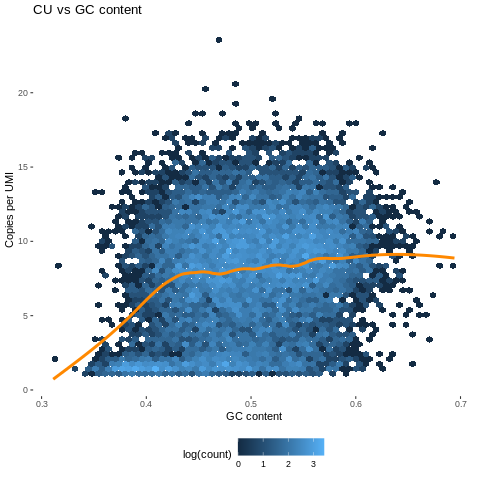

In [26]:
%%R
#####################
#Plot B
#####################
dsPlot = tibble(x=gctlcu$gc, y=gctlcu$CU)
loess_fit = loess(y~x, dsPlot, span = 0.3)
dsLoess = data.frame(x = dsPlot$x, y = predict(loess_fit))

pB = ggplot(dsPlot, aes(x=x, y=y)) +
  stat_binhex(bins=60,na.rm = TRUE, mapping=aes(x = x, y=y, fill = log(..count..))) + # opts(aspect.ratio = 1) +
  geom_line(data=dsLoess, color="#FF8800", size=1.4) + 
  labs(y="Copies per UMI", x="GC content", title="CU vs GC content") +
  theme(panel.background = element_rect("white", "white", 0, 0, "white"),
        legend.position= "bottom", legend.direction = "horizontal",#, legend.title = element_blank())
        strip.text.x = element_text(size = 12, face = "bold"),
        #legend.position= "none",
        strip.background = element_blank())
print(pB)



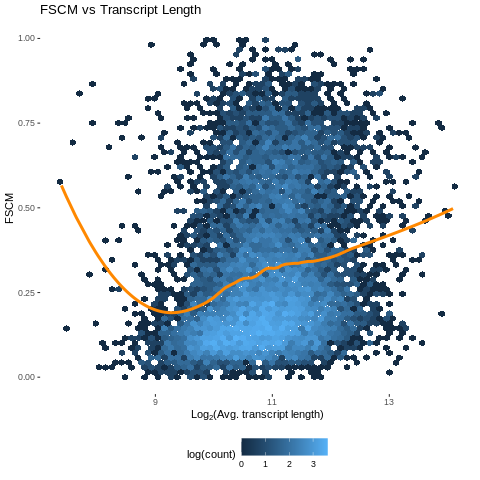

In [27]:
%%R
#####################
#Plot C
#####################
dsPlot = tibble(x=log2(gctlcu$txlen), y=gctlcu$FSCM)
dim(dsPlot)#11826
#filter extreme values
dsPlot = dsPlot[(dsPlot$x < 15) & (dsPlot$x > 7),]
dim(dsPlot)#11823, so, filtered 3 genes

loess_fit = loess(y~x, dsPlot, span = 0.3)
dsLoess = data.frame(x = dsPlot$x, y = predict(loess_fit))

pC = ggplot(dsPlot, aes(x=x, y=y)) +
  stat_binhex(bins=60,na.rm = TRUE, mapping=aes(x = x, y=y, fill = log(..count..))) + # opts(aspect.ratio = 1) +
  geom_line(data=dsLoess, color="#FF8800", size=1.4) + 
  labs(y="FSCM", x=expression(Log[2]*"(Avg. transcript length)"), title="FSCM vs Transcript Length") +
  theme(panel.background = element_rect("white", "white", 0, 0, "white"),
        legend.position= "bottom", legend.direction = "horizontal",#, legend.title = element_blank())
        strip.text.x = element_text(size = 12, face = "bold"),
        #legend.position= "none",
        strip.background = element_blank())
print(pC)


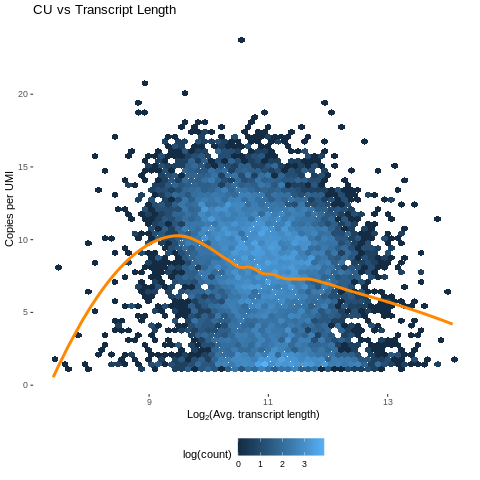

In [28]:
%%R
#####################
#Plot D
#####################
dsPlot = tibble(x=log2(gctlcu$txlen), y=gctlcu$CU)
dim(dsPlot)#11826
#filter extreme values
dsPlot = dsPlot[(dsPlot$x < 15) & (dsPlot$x > 7),]
dim(dsPlot)#11823, so, filtered 3 genes

loess_fit = loess(y~x, dsPlot, span = 0.3)
dsLoess = data.frame(x = dsPlot$x, y = predict(loess_fit))

pD = ggplot(dsPlot, aes(x=x, y=y)) +
  stat_binhex(bins=60,na.rm = TRUE, mapping=aes(x = x, y=y, fill = log(..count..))) + # opts(aspect.ratio = 1) +
  geom_line(data=dsLoess, color="#FF8800", size=1.4) + 
  labs(y="Copies per UMI", x=expression(Log[2]*"(Avg. transcript length)"), title="CU vs Transcript Length") +
  theme(panel.background = element_rect("white", "white", 0, 0, "white"),
        legend.position= "bottom", legend.direction = "horizontal",#, legend.title = element_blank())
        strip.text.x = element_text(size = 12, face = "bold"),
        #legend.position= "none",
        strip.background = element_blank())
print(pD)


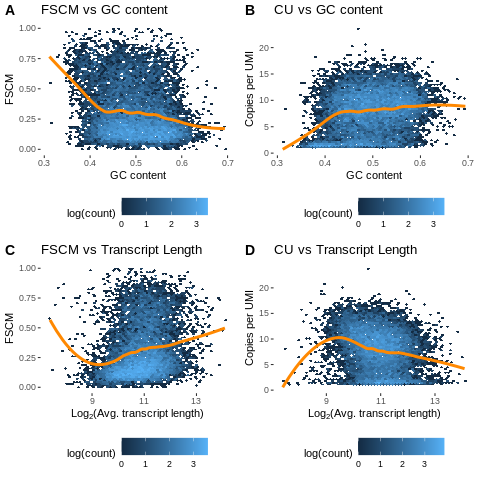

In [29]:
%%R
###########################
# Assemble all plots
###########################

figS6 = ggarrange(pA, pB, pC, pD, nrow=2, ncol=2, labels=c("A","B","C","D"))
print(figS6)

ggsave(
  paste0(figure_path, "FigS6.png"),
  plot = figS6, device = "png",
  width = 6, height = 7.4, dpi = 300)

